# EECS 491 Assignment 2

## - Randolph Zhao

## Q1. Conditional Independence

### 1.1

From the given Bayes net, we know 

\begin{align} 
p(a,b,c)&=p(c|a,b)p(a)p(b) 
\end{align}

Thus, we have

\begin{align} 
p(a,b)&=\sum_c {p(a,b,c)} \\
&= \sum_c {p(c|a,b)p(a)p(b)} \\
&= p(a)p(b) \sum_c {p(c|a,b)} \\
&= p(a)p(b) \\
\end{align}
Thus, we have $a \perp b\, |\, \varnothing$.

### 1.2

From the given Bayes net, we know 

\begin{align} 
p(a,b,c,e)&=p(e|c)p(c|a,b)p(a)p(b) 
\end{align}

Thus, we have

\begin{align} 
p(a,b|e)&=\frac{p(a,b,e)}{p(e)} \\
&= \frac{\sum_c p(a,b,c,e)}{p(e)} \\
&= \frac{p(a)p(b) \sum_c p(e|c)p(c|a,b)}{p(e)} \\
\end{align}

\begin{align} 
p(a|e)&=\frac{p(a,e)}{p(e)} \\
&= \frac{\sum_{b,c} p(a,b,c,e)}{p(e)} \\
&= \frac{p(a) \sum_{b,c} p(e|c)p(c|a,b)p(b)}{p(e)} \\
\end{align}

\begin{align} 
p(b|e)&=\frac{p(b,e)}{p(e)} \\
&= \frac{\sum_{a,c} p(a,b,c,e)}{p(e)} \\
&= \frac{p(b) \sum_{a,c} p(e|c)p(c|a,b)p(a)}{p(e)} \\
\end{align}

Thus, we have

\begin{align} 
p(a|e)p(b|e)&=\frac{p(b) \sum_{a,c} p(e|c)p(c|a,b)p(a)}{p(e)} \cdot \frac{p(a) \sum_{b,c} p(e|c)p(c|a,b)p(b)}{p(e)} \\
&\neq \frac{p(a)p(b) \sum_c p(e|c)p(c|a,b)}{p(e)} \\
&= p(a,b|e) \\
\end{align}

There is a logical gap here to prove $p(a,b|e)=p(a,e)p(b,e)$. Thus, We disprove the $a \perp b\, |\, e$

## Q2. Conditional Independence and Causality

The conditional independence assumption of the given model is $p(b,c|a)=p(b|a)p(c|a)$, which means $b \perp c\, |\, a$.

The distribution of the given model is $p(a,b,c)=p(b|a)p(c|a)p(c)$. But this disturbution can be expressed by different models with different conditional distribution. For example, the joint probability distribution can also be expressed as 
$ p(a,b,c)=p(c|a,b)p(b|a)p(a)=p(c|a,b)p(a|b)p(b)=p(a|b,c)p(b|c)p(c)=...$
Thus, the given relationship does not necessarily hold.

## Q3. Model Complexity, Free Parameters, and Simplifying Assumptions

### 3.1

\begin{align} 
p(x_1,x_2,...,x_N)&=p(x_1|x_2,...,x_N)p(x_2,...,x_N) \\
&=p(x_1|x_2,...,x_N)p(x_2|x_3...,x_N)...p(x_N) \\
&= p(x_N) \prod_{i=1}^{N-1} {p(x_i|x_{i+1},...,x_N)} \\
\end{align}

### 3.2

Since each variable $x_i$ has $K$ values, we need $K-1$ to define each variable. For each conditional probability with $a$ parents, it can have $K^{m}$ possible condition probability values. Thus, according to the joint probability model I defined in 3.1 , we have 
\begin{align} 
\text{the number of free parameter}&= (K-1)K^{N-1}+(K-1)K^{N-2}+...+(K-1)K^{1-1} \\
&=(K-1) \frac{K^{N}-1}{K-1} \\
&=K^{N}-1
\end{align}
. Thus, the "Big-O" notation of the number of free parameters is $O(K^{N})$.

### 3.3

Since there are $m$ root nodes and each root node has $K$ values, we need $m(K-1)$ parameters to define them. For $N-m$ non-root nodes, each has $m$ parents with $K$ values, and thus each non-root node has $K^m$ possible parents. Each non-root node itself has $K$ value, and thus we need $K-1$ free parameter. Thus, for all $N-m$ conditional probaility of non-root nodes, we need $(N-m)(K-1)K^{m}$. Thus, the free parameter we need to define the whole model is $m(K-1)+(N-m)(K-1)K^{m}$.

### 3.4

Since it is Noisy-OR function, we only want to know whether the parent is "happened", which means it may affect the result to "happen". Thus, for each conditional probaility of non-root nodes, we only need to know the "happen" probability of each parent, which means $K=2$, and this only need $1$ parameter to define each parent. Thus, for each condition with $m$ parents, we need $m$ parameters. Similary, since K=2, we only need $m$ paramters for m root nodes. For $N-m$ non-root nodes, we need $(N-m)m$ parameters and for root nodes. Totally, we need $m+(N-m)m$ paramters to define the model.

## Q4. Models of Conditional Probability

### 4.1

If all parents does not happen ($x_j = 0$), we have $$p(x_i|pa(x_i))=1-(1-\mu_{i0})\prod_{j \in pa(x_i)} {1}=\mu_{i0}$$. When $\mu_{i0}$ is very small, we have $p(x_i|pa(x_i))\approx 0$.

If there is at least one of the parents happen ($\exists x_m \in pa(x_i), x_m=1$), we have $$p(x_i|pa(x_i))=1-(1-\mu_{i0})\prod_{j \in pa(x_i)}{(1-\mu_{ij})^{x_j}}=1-(1-\mu_{i0})\prod_{m \in pa(x_i), x_m=1}{(1-\mu_{im})}$$. When the probabililty of any $x_m=1$ is small, we have $p(x_i|pa(x_i)) \approx 1-0 = 1$.

Thus, from this aspect, we can say that the noisy-OR function can be interpreted as a "soft" form of the logical OR function.

### 4.2

$\mu_{i0}$ is the leak node, which covers some cases if all causes is not happened or missing, i.e. $\forall x_m \in pa(x_i), x_m=0$. Another explaination is that if all causes are not happened, it does not mean that the result is no likely to happen. In this case, we can use $p(x_i|pa(x_i))=\mu_{i0}$ to prevent the case that $p(x_i|pa(x_i))=0$ so that the probability is not too absolute. Normally, the $\mu_{i0}$ will be very small that $(1-\mu_{i0})$ will be close to $1$ and will not affect the normal cases a lot.

### 4.3

For sigmoid function, we have 

\begin{align} 
p(x_i|pa(x_i))&=\frac{1}{1+e^{-w_{i0}+\sum_{j \in pa(x_i)}{w_{ij}x_{j}} }}  \\
&=\frac{1}{1+e^{w_{i0}}\prod_{j \in pa(x_i)}(e^{w_{ij}})^{x_{j}} }  \\
\end{align}

Let $w_{i0}=-\ln{[-(1-\mu_{i0})]},w_{ij}=-\ln{(1-\mu_{ij})}$, we have $e^{-w_{i0}}=-(1-\mu_{i0}), e^{-w_{ij}}=(1-\mu_{ij})$, and thus

\begin{align} 
p(x_i|pa(x_i))&=\frac{1}{1-(1-\mu_{i0})\prod_{j \in pa(x_i)}{(1-\mu_{ij})^{x_{j}}}} \\
&= (Noisy-OR)^{-1} \\
\end{align}

In other words, we have $sigmoid=(Noisy-OR)^{-1}$ with $w_{i0}=-\ln{[-(1-\mu_{i0})]},w_{ij}=-\ln{[(1-\mu_{ij})]}$.

From another aspect, let's define $w_{ij}=-\ln(1-\mu_{ij})$, we have
\begin{align} 
sigmoid&=\frac{1}{1+(1-\mu_{i0})\prod_{j \in pa(x_i)}{(1-\mu_{ij})^{x_{j}}}} \\
sigmoid^{-1}&=1+ (1-\mu_{i0})\prod_{j \in pa(x_i)}{(1-\mu_{ij})^{x_{j}}} \\
2-sigmoid^{-1}&=1-(1-\mu_{i0})\prod_{j \in pa(x_i)}{(1-\mu_{ij})^{x_{j}}} \\
2-sigmoid^{-1}&=Noisy-OR \\
\end{align}

Thus, the sigmoid function can be transformed to noisy-OR function. From these two transform progresses, we can easily find the relationship between two functions. We can see that sigmoid function is more general than the noisy-OR function. Here are the reasons: 

1. Noisy-OR function only allows Boolean variables but sigmoid function can use multi-value variables. i.e. Noisy-OR requires $x_i$ has to be 0 or 1, while sigmoid has no limitation on $x_i$, which means can have multiple values.

2. Sigmoid function is derivative and has a more smoooth curve of the probability distribution. 

3. Sigmoid sums up the weights first then calculate, and thus can avoid some situation that the probabilites $(1-\mu_{ij})$ are too small to be multiplied together for computer to calculate.

However, the Noisy-OR function also is very useful under specific situations, where we want the output to be close to 0 or 1. For example, if all causes/parents doesn't happen or missing, sigmoid requires a negative infinite bias $w_{i0}$ to make the conditional probability to be zero. However, having a very positively/negatively large bias, we may not have appropiate scalar of weights to have other non-zero conditional probabilities. 

### 4.4

#### Example 1: Suitable for Noisy-OR but not for Sigmoid

Assume we have a situation that letter quality (L) depends on participation of the whole semester (S) and the quality of final paper (F). Hopefully, S and F are independent from each other, and L is independently influenced by S or F with no other factors. We define that each variable L,S,F to be good/bad as 1/0. Thus, S,F are the parents of L, where we define that $\mu_S=0.8, \mu_F=0.9$. Since all assumptions satisfy the Noisy-OR function, we can use Noisy-OR function to model it. Thus, we have

\begin{align} 
p(L=1|S=0,F=0)&=1-1=0 \\
p(L=1|S=0,F=1)&=1-1 \cdot (1-0.9)=0.9 \\
p(L=1|S=1,F=0)&=1-1 \cdot (1-0.8)=0.8 \\
p(L=1|S=1,F=1)&=1-(1-0.8) \cdot (1-0.9)=0.98 \\
\end{align}
, where all probability looks reasonable.

However, consider if we use sigmoid to model it. To make $p(L=1|S=0,F=0)=0$, we need a negative infinite bias $w_{i0}=-\infty$ so that $p(L=1|S=0,F=0)=\frac{1}{1+e^{-(-\infty+0+0)}}=0$. However, since the bias is negative infinite, no matter what the weights $w_S, w_F$ is, we cannot get a such large conditional probability as $0.9, 0.8, 0.98$. Thus, in this case, we cannot use sigmoid to model this case.

#### Example 2: Suitable for Sigmoid but not for Noisy-OR

Imagine we have a situation that parents $x_i$ has three values: 0,1,2. For $x_i=0$, it means the parent does not happen and has no influence on the child node. For $x_i=1$, it means the parent does happen and has some influence on the child node. For $x_i=2$, it means the parent does happen and has extremely large (or even deciding) influence on the child node. In this case, since sigmoid can allow $x_j$ has any values, we can use sigmoid to model this situation. However, Noisy-OR requires $x_j$ has to be only 0 or 1 and thus we cannot use Noisy-OR in this case.

Example:
Similar to the Example 1, but for this time, we define that both S and F can provide a large amount of extra credits. Thus, for this time, let's define $S=2$ means participation provides a large extra credits.  

To make the example simple, define $w_S=1,w_F=1$. Thus, we have
\begin{align} 
p(L=1|S=0,F=0)&=\frac{1}{2} \\
p(L=1|S=0,F=1)&=\frac{1}{1+e^{-1}} \\
p(L=1|S=0,F=2)&=\frac{1}{1+e^{-2}} \\
p(L=1|S=1,F=0)&=\frac{1}{1+e^{-1}} \\
p(L=1|S=1,F=1)&=\frac{1}{1+e^{-2}} \\
p(L=1|S=1,F=2)&=\frac{1}{1+e^{-3}} \\
p(L=1|S=2,F=0)&=\frac{1}{1+e^{-2}} \\
p(L=1|S=2,F=1)&=\frac{1}{1+e^{-3}} \\
p(L=1|S=2,F=2)&=\frac{1}{1+e^{-4}} \\
\end{align}
, which looks as a reasonable trendency. Thus, we can use sigmoid to model this case. However, since there are three values for $x_j$, it cannot be modeled by Noisy-OR function.

## Q5. Car Troubles

### 5.1

\begin{align} 
p(a|e)p(b|e)&= \frac{p(f=empty, s=no)}{p(s=no)} \\
&= \frac{\sum_{b,t} {p(s=no|f=empty,t)p(f=empty)p(t|b)p(b)}}{\sum_{b,f,t} {p(s=no|t,f)p(f)p(t|b)p(b)}} \\
&= \frac{.92\cdot .05\cdot .97\cdot .98+.92\cdot .05\cdot .02\cdot .02+.99\cdot .05\cdot .03\cdot .98+.99\cdot .05\cdot .98\cdot .02}{.01\cdot .95\cdot .97\cdot .98+.01\cdot .95\cdot .02\cdot .02+1\cdot .95\cdot .03\cdot .98+1\cdot .95\cdot .98\cdot .02+.92\cdot .05\cdot .97\cdot .98+.92\cdot .05\cdot .02\cdot .02+.99\cdot .05\cdot .03\cdot .98+.99\cdot .05\cdot .98\cdot .02} \\
&= \frac{0.0461715}{0.101756} \\
&\approx 0.45374 \\
\end{align}

### 5.2

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np

bayesNet = BayesianModel()
bayesNet.add_node("b")
bayesNet.add_node("f")
bayesNet.add_node("t")
bayesNet.add_node("g")
bayesNet.add_node("s")

bayesNet.add_edge("b", "g")
bayesNet.add_edge("f", "g")
bayesNet.add_edge("b", "t")
bayesNet.add_edge("f", "s")
bayesNet.add_edge("t", "s")

cpd_b = TabularCPD('b', 2, values=[[.02], [.98]])
cpd_f = TabularCPD('f', 2, values=[[.05], [.95]])
cpd_g = TabularCPD('g', 2, values=[[.99, .10, .97, .04], [.01, .90, .03, .96]],
                   evidence=['b', 'f'], evidence_card=[2, 2])
cpd_t = TabularCPD('t', 2, values=[[0.98, .03], [.02, .97]],
                   evidence=['b'], evidence_card=[2])
cpd_s = TabularCPD('s', 2, values=[[0.99, 1.0, .92, .01], [.01, 0.0, .08, .99]],
                   evidence=['t', 'f'], evidence_card=[2, 2])

bayesNet.add_cpds(cpd_b, cpd_f, cpd_g, cpd_t, cpd_s)

solver = VariableElimination(bayesNet)

result = solver.query(variables=['f'], evidence={'s': 0}, show_progress=False)

print('p(f=empty|s=no)=', result.values[0])

p(f=empty|s=no)= 0.45374719918235784


The result is the same as the answer calculated by hand.

### 5.3

Before we talk, I have a basic guess about whether the car will start. Based on the past experience, I guess the car could start since 
\begin{align} 
p(s=yes)&=0.8982 \\
p(s=no)&=0.1018 \\
\end{align}

My Friend: "the car won't start"

As I heard the car cannot start, I have a guess about reason. Based on the past experience, I guess the reason that the car cannot start is more likely to be no turns over since 
\begin{align} 
p(f=empty|s=no)&=0.4537 \\
p(t=fa|s=no)&=0.4813 \\
p(b=bad|s=no)&=0.1927 \\
\end{align}
. Since the reason is more likely to be no turns over, I will first ask about the condition of turns over.

#### Scenario 1: Suppose the real cause is no battery and no fuel, with no guage and no turns over.

Me: "how about turns over" 
My Friend: "No turns over"

As I knew one reason is no turns over, I want to further check whether it has bad battery or no fuel. Although it is more likely that the battery is not bad, compared to the probability of having empty fuel, having bad battery is more likely since
\begin{align} 
p(b=bad|s=no,t=fa)&=0.4 \\
p(b=not bad|s=no,t=fa)&=0.6 \\
p(f=empty|s=no,t=fa)&=0.0495 \\
p(f=notempty|s=no,t=fa)&=0.9505 \\
\end{align}
. Besides, I think fuel is largely likely to be not empty. To check whether the bad battery is the reason, I will ask the condition of gauge.

Me: "how about gauge?"
My friend: "Gauge is empty"

As I heard there is empty gauge, I think the reason is more likely to be bad battery since 
\begin{align} 
p(b=bad|s=no,t=fa,g=empty)=0.5274 \\
p(b=not bad|s=no,t=fa,g=empty)=0.4726 \\
p(f=empty|s=no,t=fa,g=empty)=0.4433 \\
p(f=not empty|s=no,t=fa,g=empty)=0.5567 \\
\end{align}
. Given the information that gauge is empty, the conditional probability that battery is bad finally becomes the highest among all reasons. Thus, based on past experience, I got the conclusion that the reason that the car cannot start is bad battery. 

#### Scenario 2: Suppose the real cause is no fuel, with no guage and good turns over.

Me: "how about turns over" 
My friend: "Good turns over"

As I heard there is good turns over, I immediately thought that battery is likely to be good and no fuel is more likely to be the main reason in this case since 
\begin{align} 
p(b=good|s=no,t=tr)&=0.9996 \\
p(b=bad|s=no,t=tr)&= 0.0004 \\
p(f=empty|s=no,t=tr)&=0.8288 \\
p(f=not empty|s=no,t=tr)&=0.1712 \\
\end{align}
. To check whether it is also caused by no fuel in this case, I will ask the condition of gauge.

Me: "how about gauge?"
My friend: "Gauge is empty"

As I heard there is empty gauge, I immediately thought that no fuel is the reason because 
\begin{align} 
p(b=good|s=no,t=tr,g=empty)&=0.9996 \\
p(b=good|s=no,t=tr,g=empty)&= 0.0004 \\
p(f=empty|s=no,t=tr,g=empty)&=0.9916 \\
p(f=not empty|s=no,t=tr,g=empty)&=0.0084 \\
\end{align}
. Given the information that gauge is empty, it strengthen my thought that empty fuel is the causse. Thus, in this case, I strongly thought the no fuel is the main reason.

Based on past experience, I got the conclusion that the reason that the car cannot start is no fuel. 

## Exploration

Bayesian Belief Networks are oftern applied on disease diagnostic. Since my family has the family history of heart disease, we want to design a network for heart disease diagnostic. I want to build a diagnostic system that not only for professionals, but also for the public. In other words, I will include some nodes about daily information that would causes symptoms. The public can input daily information to predict an approximate probability about heart disease while the professionals can input detialed symptoms that maybe most of us cannot understand but can increase the accuracy of the probability of prediction a heart disease. 

To include as many features as I can and also keep the model clear to read and recognize, I use the following abbreviations for all features:

Symptoms:
1. Atheresclerosis (AT)
2. Serum Selenium (SS)
3. High Blood Pressure (HBP)
4. Family history (FH)
5. Adverse Medicine (AM)

Global Factors:
1. Age (A)
2. Gender (G)

Results:
1. Heart Disease (HD)
2. Had Again (HA)

Factor of Symptoms:
1. Diet (D)
2. Obesity (O)
3. Serum LDL (SL)
4. Moderate Exercise (ME)
5. Medicine Taken (MT)
6. Smoking and Alcohol (SA)
7. Secrum Triglyceride (ST)
8. Cholesterol HDH Ratio (CHR)

The relation between each node/feature is following (also shows in the following figure):

1. Male will be more likely to have high blood pressure and heart disease, while female will be less likely.
2. The old will be more likely to have obesity, high cholesterol HDH ratio, atheresclerosis, high blood pressure, and heart disease.
3. Obesity may be caused by bad diet and not moderate exercise.
4. All high serum Triglyceride, abnormal serum selenium, high serum LDL, and high cholesterol HDH ratio may be caused by bad diet.
5. High blood pressure may be caused by smoking and alcohol, medicine taken, not moderate exercise, and obesity.
6. Atheroslerosis may be caused by not moderate exercise, high serum LDL, abnormal serum Triglyceride, and highcholesterol HDH ratio.
7. Heart Disease has five symptoms: Atheresclerosis, Secrum Selenium, High Blood Pressure, Family history, and Adverse Medicine.
8. Whether will have again only depends on whether I will have heart disease. If I had heart disease before, it will be more likely that I will suffer other heart disease in the future.

Since I use Boolean features in my model to keep it simple, I define the $x_{i}=1$ is the case that the $x_{i}$ will increase the probability to have heart diseases as following:

Symptoms:
1. Atheresclerosis(not have/have) $\sim$ 0/1
2. Serum Selenium (not high/high) $\sim$ 0/1
3. High Blood Pressure (low/high) $\sim$ 0/1
4. Family history (not have/have) $\sim$ 0/1
5. Adverse Medicine (not have/have) $\sim$ 0/1

Global Factors:
1. Age (young/old) $\sim$ 0/1
2. Gender (female/male) $\sim$ 0/1

Results:
1. Heart Disease (not have/have) $\sim$ 0/1
2. Had Again (will not/will have) $\sim$ 0/1

Factor of Symptoms:
1. Diet (good/bad) $\sim$ 0/1
2. Obesity (no/yes) $\sim$ 0/1
3. Serum LDL (low/high) $\sim$ 0/1
4. Moderate Exercise (no/yes) $\sim$ 0/1
5. Medicine Taken (no/yes) $\sim$ 0/1
6. Smoking and Alcohol (no/yes) $\sim$ 0/1
7. Serum Triglyceride (normal/abnormal) $\sim$ 0/1
8. Cholesterol HDH Ratio (low/high) $\sim$ 0/1

To make the network structure more clearly, I define three layers in this heart-disease model: 
1. preparation, including factors of sympotoms
2. heart-disease-diagonotics, including sympotoms and heard disease
3. have-agian-prediction, including had again

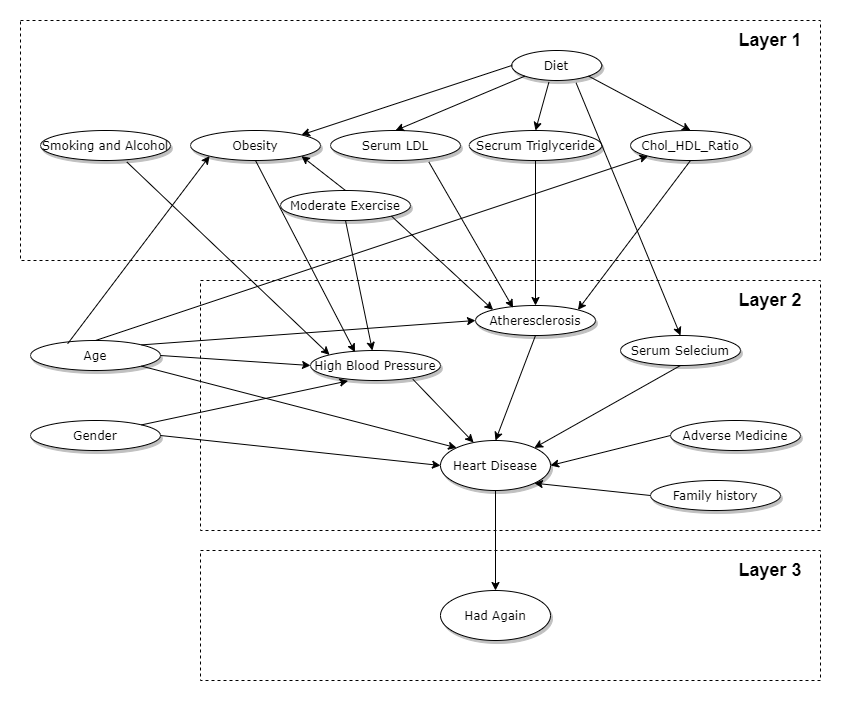

In [2]:
from IPython.display import Image

Image(filename =r'C:\hd.png')

In [6]:
# Implement this BN
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

abbreviations = {
    'Diet': 'D', 'Obesity': 'O', 'Moderate Exercise': 'ME', 'Medicine Taken': 'MT',
    'Serum Triglyceride': 'ST', 'Cholesterol HDH Ratio': 'CHR', 'Serum LDL': 'SL', 
    'Smoking And Alcohol': 'SA', 'Atheresclerosis': 'AT', 'Serum Selenium': 'SS', 
    'High Blood Pressure': 'HBP', 'Family history': 'FH', 'Adverse Medicine': 'AM', 
    'Heart Disease': 'HD', 'Age': 'A', 'Gender': 'G', 'Had Again': 'HA'
                }

nodes = list(abbreviations.values())

age_factor = 1.05
gender_factor = 1.02

# build the BN
def buildNetwork():    
    heartNet = BayesianModel()

    # Import all nodes
    for node in nodes:
        heartNet.add_node(node)

    # Add layer of sympotoms and their factors
    heartNet.add_edge("D", "O")
    heartNet.add_edge("D", "ST")
    heartNet.add_edge("D", "SS")
    heartNet.add_edge("D", "SL")
    heartNet.add_edge("D", "CHR")
    heartNet.add_edge("SL", "AT")
    heartNet.add_edge("ST", "AT")
    heartNet.add_edge("CHR", "AT")
    heartNet.add_edge("ME", "AT")
    heartNet.add_edge("ME", "O")
    heartNet.add_edge("ME", "HBP")
    heartNet.add_edge("MT", "HBP")
    heartNet.add_edge("SA", "HBP")
    heartNet.add_edge("O", "HBP")
    heartNet.add_edge("A", "O")
    heartNet.add_edge("A", "CHR")

    p_o_1 = [.02, .05, .05, .4, .1, .17, .2, .67]
    p_o_0 = [1-x for x in p_o_1]
    
    cpd_a = TabularCPD('A', 2, values=[[.6], [.4]])
    cpd_d = TabularCPD('D', 2, values=[[.6], [.4]])
    cpd_o = TabularCPD('O', 2,values=[p_o_0, p_o_1],
                        evidence=['ME', 'D', 'A'], evidence_card=[2, 2, 2])
    cpd_me = TabularCPD('ME', 2, values=[[.5], [.5]])
    cpd_mt = TabularCPD('MT', 2, values=[[.5], [.5]])
    cpd_sa = TabularCPD('SA', 2, values=[[.8], [.2]])    
    cpd_st = TabularCPD('ST', 2,values=[[.75, .25], [.25, .75]],
                        evidence=['D'], evidence_card=[2])
    cpd_chr = TabularCPD('CHR', 2,values=[[.9, .3, .6, .17], [.1, .7, .4, .83]],
                        evidence=['D', 'A'], evidence_card=[2, 2])
    cpd_sl = TabularCPD('SL', 2,values=[[.75, .25], [.25, .75]],
                        evidence=['D'], evidence_card=[2])

    heartNet.add_cpds(cpd_a, cpd_d, cpd_o, cpd_me, 
                      cpd_mt, cpd_st, cpd_chr, cpd_sl, cpd_sa)

    # Add layer of heart disease diagnostics
    heartNet.add_edge("AT", "HD")
    heartNet.add_edge("SS", "HD")
    heartNet.add_edge("HBP", "HD")
    heartNet.add_edge("FH", "HD")
    heartNet.add_edge("AM", "HD")
    heartNet.add_edge("A", "AT")
    heartNet.add_edge("A", "HBP")
    heartNet.add_edge("G", "HBP")
    heartNet.add_edge("A", "HD")
    heartNet.add_edge("G", "HD")

    p_at = [.2, .28, .28, .35, .68, .71, .71, .74,
            .52, .57, .57, .61, .81, .83, .83, .84]
    p_at_1 = [_ / age_factor for _ in p_at]
    p_at_1.extend([_ * age_factor for _ in p_at])
    p_at_0 = [1-x for x in p_at_1]
    
    p_hbp = [.07, .13, .25, .31, .34, .40, .52, .58,
             .52, .58, .70, .76, .79, .85, .87, .92]
    p_hbp_1 = [_ / age_factor / gender_factor for _ in p_hbp]
    p_hbp_1.extend([_ / age_factor * gender_factor for _ in p_hbp])
    p_hbp_1.extend([_ * age_factor / gender_factor for _ in p_hbp])
    p_hbp_1.extend([_ * age_factor * gender_factor for _ in p_hbp])
    p_hbp_0 = [1-x for x in p_hbp_1]
    
    p_hd = [.1, .19, .28, .35, .64, .68, .71, .74,
            .28, .35, .42, .48, .71, .74, .77, .79,
            .73, .76, .78, .80, .89, .90, .91, .91,
            .78, .80, .82, .84, .91, .92, .93, .94]
    p_hd_1 = [_ / age_factor / gender_factor for _ in p_hd]
    p_hd_1.extend([_ / age_factor * gender_factor for _ in p_hd])
    p_hd_1.extend([_ * age_factor / gender_factor for _ in p_hd])
    p_hd_1.extend([_ * age_factor * gender_factor for _ in p_hd])
    p_hd_0 = [1-x for x in p_hd_1]
    
    cpd_g = TabularCPD('G', 2, values=[[.4], [.6]])
    cpd_at = TabularCPD('AT', 2,values=[p_at_0, p_at_1],
                        evidence=['SL', 'ST', 'ME', 'CHR', 'A'],
                        evidence_card=[2, 2, 2, 2, 2])
    cpd_ss = TabularCPD('SS', 2,values=[[.7, .3], [.3, .7]],
                        evidence=['D'], evidence_card=[2])    
    cpd_hbp = TabularCPD('HBP', 2,values=[p_hbp_0, p_hbp_1],
                        evidence=['MT', 'SA', 'ME', 'O', 'A', 'G'],
                         evidence_card=[2, 2, 2, 2, 2, 2])
    cpd_fh = TabularCPD('FH', 2, values=[[.85], [.15]])
    cpd_am = TabularCPD('AM', 2, values=[[.8], [.2]])
    cpd_hd = TabularCPD('HD', 2,values=[p_hd_0, p_hd_1],
                        evidence=['AT', 'SS', 'HBP', 'FH', 'AM', 'A', 'G'],
                        evidence_card=[2, 2, 2, 2, 2, 2, 2])

    heartNet.add_cpds(cpd_g, cpd_at, cpd_ss, cpd_hbp, cpd_fh, cpd_am, cpd_hd)
    
    # Add layer of predict the probability of next heart disease
    heartNet.add_edge("HD", "HA")
    
    cpd_hn = TabularCPD('HA', 2,values=[[.6, .25], [.4, .75]],
                        evidence=['HD'], evidence_card=[2])
    heartNet.add_cpds(cpd_hn)
    
    # Build the solver of the BN
    solver = VariableElimination(heartNet)
    
    return heartNet, solver

# Define a function that can use condition to check the probability
def get_prob(solver, condition):
    prob_hd = solver.query(variables=['HD'], evidence=condition,
                           show_progress=False).values[1]
    prob_ha = solver.query(variables=['HA'], evidence=condition,
                           show_progress=False).values[1]
    return prob_hd, prob_ha

# Draw out the network by using networkx
def draw(heartNet):
    nx.draw(heartNet, with_labels=True, node_size=5000,
            font_size=20, node_color='#00b4d9')
    plt.rcParams["figure.figsize"]=10,10
    plt.show()

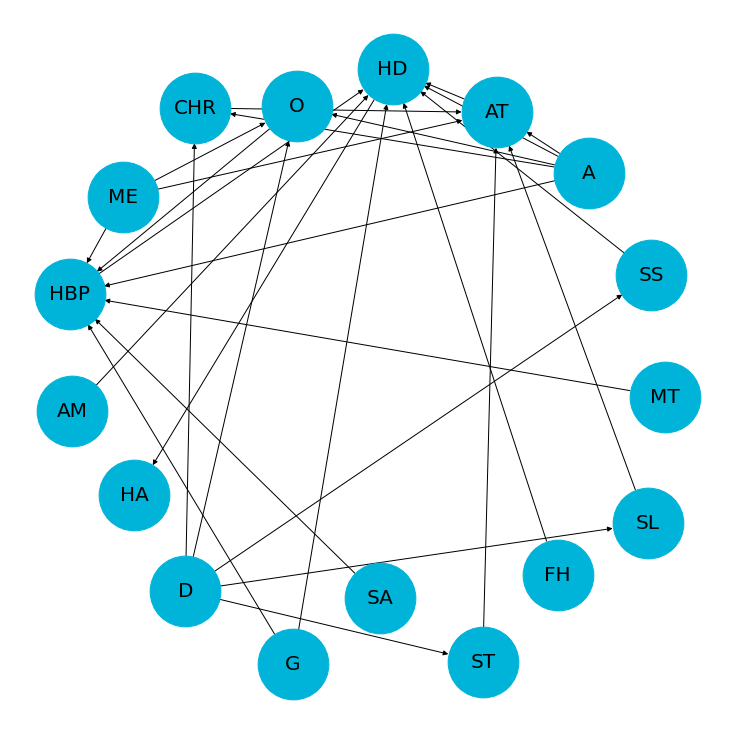

In [8]:
# draw the resulting BN by using networkx
heartNet, solver = buildNetwork()
draw(heartNet)

Let's test our model on some real-world cases.

Case 1: My roommate. 

May reduce the probability: no family history, moderate exercise, no smoking and drinking, no medicine taken, no adverse medicine, no obesity, and young.

May increase the probability: Bad diet, male

In [9]:
# test one case of my roommate
heartNet, solver = buildNetwork()
condition = {'D': 1, 'FH': 0, 'ME': 0, 'MT': 0,
             'SA': 0, 'AM': 0, 'A': 0, 'G': 1, 'O': 0}
prob_hd, prob_ha = get_prob(solver, condition)
print(f'My roommate has {prob_hd*100:.1f}% probability to get heart disease and has {prob_ha*100:.1f}% probability to have again.')

My roommate has 26.1% probability to get heart disease and has 49.1% probability to have again.


Case 2: Me.

May reduce the probability: good diet, no medicine taken, no smoking and drinking, no medicine taken, no adverse medicine, and young.

May increase the probability: family history, little exercise, obesity, male

In [10]:
# test one case of me
heartNet, solver = buildNetwork()
condition = {'D': 0, 'FH': 1, 'ME': 1, 'MT': 0, 'SA': 0,
             'AM': 0, 'A': 0, 'G': 1, 'O': 1}
prob_hd, prob_ha = get_prob(solver, condition)
print(f'I have {prob_hd*100:.1f}% probability to get heart disease and has {prob_ha*100:.1f}% probability to have again.')

I have 71.6% probability to get heart disease and has 65.1% probability to have again.


Case 3: Me (information provided by a professional).

May reduce the probability: good diet, no medicine taken, no smoking and drinking, no medicine taken, no adverse medicine, and young, no atheresclerosis, low serum selenium, high blood pressure.

May increase the probability: family history, little exercise, obesity, male

In [11]:
# test one case of me (information provided by a professional)
heartNet, solver = buildNetwork()
condition = {'D': 0, 'FH': 1, 'ME': 1, 'MT': 0, 'SA': 0,
             'AM': 0, 'A': 0, 'G': 1, 'O': 1, 'AT': 0, 'SS': 0, 'HBP': 1}
prob_hd, prob_ha = get_prob(solver, condition)
print(f'I have {prob_hd*100:.1f}% probability to get heart disease and has {prob_ha*100:.1f}% probability to have again.')

I have 74.7% probability to get heart disease and has 66.1% probability to have again.


#### Result Analysis

The result makes sense since I have little exercise, family history, and a little overweight, I have a higher probability than my roommate to get heart disease and thus I have a higher probability to have heart disease again. Further, by providing more professional details, which shows I have high blood pressure, the probability of having heart disease increase definitely. Thus, I think this model gives a relatively reasonable prediction on the probability of having heart disease and the chance to have heart disease again.

#### Importance of nodes to the probability of having heart disease

The most useful information is provided by 'diet', which has influenced 3 out of 5 symtoms. And diet is also very easy to be collected. To further improve the accuracy of predicted probability, people should first provide moderate exercise, since it also is related to 2 symtoms. Then, family history and adverse medicine are also easy to be collected. They provide the last 2 symptoms related directly to the probability of heart disease. Although age and gender are also influecial, they just increase/decrease little probability on heart disease. In this case, we have most of information related to heart disease by collecting four features.

#### Further Inference Exploration
Since we think this model is reasonable, we can use this model to infer some relationships between nodes.

In [12]:
# Print independencies of all nodes

heartNet, solver = buildNetwork()
for node in nodes:
    print(heartNet.local_independencies(node))

(D _|_ G, SA, FH, ME, AM, MT, A)
(O _|_ G, SL, SA, FH, AM, AT, CHR, SS, MT, ST | ME, D, A)
(ME _|_ G, SL, SA, FH, D, AM, A, CHR, SS, MT, ST)
(MT _|_ G, SL, SA, FH, ME, D, AM, A, O, AT, CHR, SS, ST)
(ST _|_ G, SL, SA, FH, ME, AM, A, O, HBP, CHR, SS, MT | D)
(CHR _|_ G, SL, SA, FH, ME, AM, O, HBP, ST, SS, MT | D, A)
(SL _|_ G, SA, FH, ME, AM, A, O, HBP, CHR, SS, MT, ST | D)
(SA _|_ G, SL, FH, ME, D, AM, A, O, AT, CHR, SS, MT, ST)
(AT _|_ G, SA, FH, D, AM, O, HBP, SS, MT | ST, SL, CHR, ME, A)
(SS _|_ G, SL, SA, FH, ME, AM, A, O, HBP, AT, CHR, MT, ST | D)
(HBP _|_ SL, FH, D, AM, AT, CHR, SS, ST | G, O, SA, ME, MT, A)
(FH _|_ G, SL, SA, ME, D, AM, A, O, HBP, AT, CHR, SS, MT, ST)
(AM _|_ G, SL, SA, FH, ME, D, A, O, HBP, AT, CHR, SS, MT, ST)
(HD _|_ SL, SA, ME, D, O, CHR, MT, ST | G, AT, HBP, FH, SS, AM, A)
(A _|_ G, SL, SA, FH, ME, D, AM, ST, SS, MT)
(G _|_ SL, SA, FH, ME, D, AM, A, O, AT, CHR, SS, MT, ST)
(HA _|_ G, SL, SA, FH, ME, D, AM, A, O, HBP, AT, CHR, SS, MT, ST | HD)


Let's dive into the results and analyze some of the independencies. 

First, we can find that the 'Had Again' is conditionally independent from all nodes given 'Heart Disease'. It is similar to the idea of dynamic bayesian network, where the node $x_{t+1}$ only is conditionally independent on other nodes given the $x_t$. Here, this result makes sense because 'Had Again' will have high probability only when one have high chance to get heart disease and then his/her heart is weak and thus easy to get other heart diseases.

Second, it is reasonable at the first glance that 'Serum Selenium' is conditional independent of 'High blood pressure' and 'Obesity' on their common reason 'Diet'. However, from the network, it is difficult to find that the 'Serum Selenium' also is conditional independent of 'Atheresclerosis' given the 'Diet'. However, since the parents of 'Atheresclerosis' all have common reason 'Diet' with 'Serum Selenium', given the 'Diet', all reasons of 'Atheresclerosis' is independent of 'Serum Selenium', and thus it is reasonable that 'Atheresclerosis' is also indepdent of 'Serum Selenium' given 'Diet'.

Third, it is very interesting to see that the algorithm gives the independencies of 'Heart Disease' that 'Heart Disease' is conditionally independent from all factors of symptoms given its all five symptoms, age, and gender. There are two ways to explain this. 1. Given its all five symptoms, age, and gender, the 'Heart Disease' has already to be constant and thus is independent of other nodes. 2. Consider a case that we have three nodes:$a,b,c$, and $a \rightarrow b \rightarrow c$. As Professor said in the lecture, $a \perp\!\!\!\perp b | c$. Here, the independency of 'Heart Disease' is a special version of this case, where all factors of symptoms is 'a'; symptoms, age, and gender is 'b'; and 'heart disease' is 'c'.